# Assignment 4 Convolutional Network (CNN)
In this homework you will practice how to create Convolutional Neural Network (CNN) in Tensorflow 2.0 using Keras APIs. First, you will construct CNN by follow the specific requirements and architectures. Then, you will construct you own CNN to achieve a certain accuracy on testing data. Both CNNs will be trained on CIFAR-10 dataset.

In [1]:
# A bit of setup and verify data
import tensorflow as tf
from tensorflow.keras import datasets, layers, models, optimizers
import matplotlib.pyplot as plt


(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0


class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

<Figure size 1000x1000 with 25 Axes>

## Create CNN model
Fill codes between TO DO block to construct the model by follow these requreiments and architecture
- 32 of 5x5 filters with stride 1
- Relu activation
- 64 of 5x5 filters with stride 1
- Relu activation
- 2x2 Max Pooling with stride 2
- Fully connected with 1024 hidden neurons
- Relu activation
- Fully connected that map to 10 output classes
- Softmax


In [2]:
model = models.Sequential()

# TO DO
model.add(tf.keras.layers.Conv2D(32, (5, 5),activation='relu'))
model.add(tf.keras.layers.Conv2D(64, (5, 5),activation='relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2),strides=2))
model.add(tf.keras.layers.Flatten(input_shape=(4, 1)))
model.add(tf.keras.layers.Dense(1024, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

# END TO DO

#model.summary()

## Define optimizer and fit model
- Adam optimizer with learning rate = 1e-5
- Show loss and accruacy
- Train for 10 epoches
- Use batch size = 128
- Split validation data from training data by using split 90:10


In [3]:
# TO DO
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
history=model.fit(train_images,train_labels,epochs=10, validation_split=0.10)


# END TO DO

Train on 45000 samples, validate on 5000 samples
Epoch 1/10
45000/45000 [==============================] - 159s 4ms/sample - loss: 1.4546 - accuracy: 0.4761 - val_loss: 1.2458 - val_accuracy: 0.5494
Epoch 2/10
45000/45000 [==============================] - 158s 4ms/sample - loss: 1.0707 - accuracy: 0.6233 - val_loss: 1.0941 - val_accuracy: 0.6162
Epoch 3/10
45000/45000 [==============================] - 158s 4ms/sample - loss: 0.8339 - accuracy: 0.7112 - val_loss: 1.0092 - val_accuracy: 0.6614
Epoch 4/10
45000/45000 [==============================] - 162s 4ms/sample - loss: 0.5890 - accuracy: 0.7963 - val_loss: 1.0687 - val_accuracy: 0.6630
Epoch 5/10
45000/45000 [==============================] - 680s 15ms/sample - loss: 0.3549 - accuracy: 0.8795 - val_loss: 1.2072 - val_accuracy: 0.6644
Epoch 6/10
45000/45000 [==============================] - 165s 4ms/sample - loss: 0.2028 - accuracy: 0.9301 - val_loss: 1.6167 - val_accuracy: 0.6568
Epoch 7/10
45000/45000 [==========================

## Evaluate the model

10000/1 - 6s - loss: 3.0200 - accuracy: 0.6356


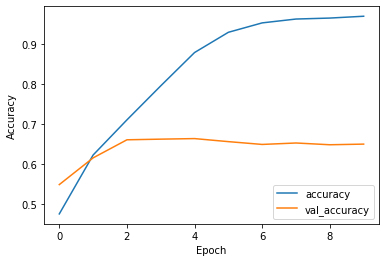

In [4]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

## Build your own model
Construct the model in TO DO block to get the test accuracy > ~70%. You can use any available techniques.
- Initialization
- Early stop
- Optimizer
- Value of hyper parameters
- Drop out
- etc.

In [3]:
model = models.Sequential()

# TO DO
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))


# END TODO

model.summary()
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 38s 760us/sample - loss: 1.4723 - accuracy: 0.4660 - val_loss: 1.2555 - val_accuracy: 0.5481
Epoch 2/10
50000/50000 [==============================] - 41s 829us/sample - loss: 1.1025 - accuracy: 0.6113 - val_loss: 1.0481 - val_accuracy: 0.6276
Epoch 3/10
50000/50000 [==============================] - 37s 740us/sample - loss: 0.9463 - accuracy: 0.6693 - val_loss: 0.9508 - val_accuracy: 0.6680
Epoch 4/10
50000/50000 [==============================] - 39s 781us/sample - loss: 0.8447 - accuracy: 0.7052 - val_loss: 0.8915 - val_accuracy: 0.6854
Epoch 5/10
50000/50000 [==============================] - 36s 720us/sample - loss: 0.7614 - accuracy: 0.7352 - val_loss: 0.8740 - val_accuracy: 0.7010
Epoch 6/10
50000/50000 [==============================] - 36s 712us/sample - loss: 0.6979 - accuracy: 0.7554 - val_loss: 0.8414 - val_accuracy: 0.7206
Epoch 7/10
50000/50000 [====================